# Image File Management

Opening image files and saving images into files are the start and finish of image processing, and there are several subtleties you must be aware of.

Let's handle some image files. 

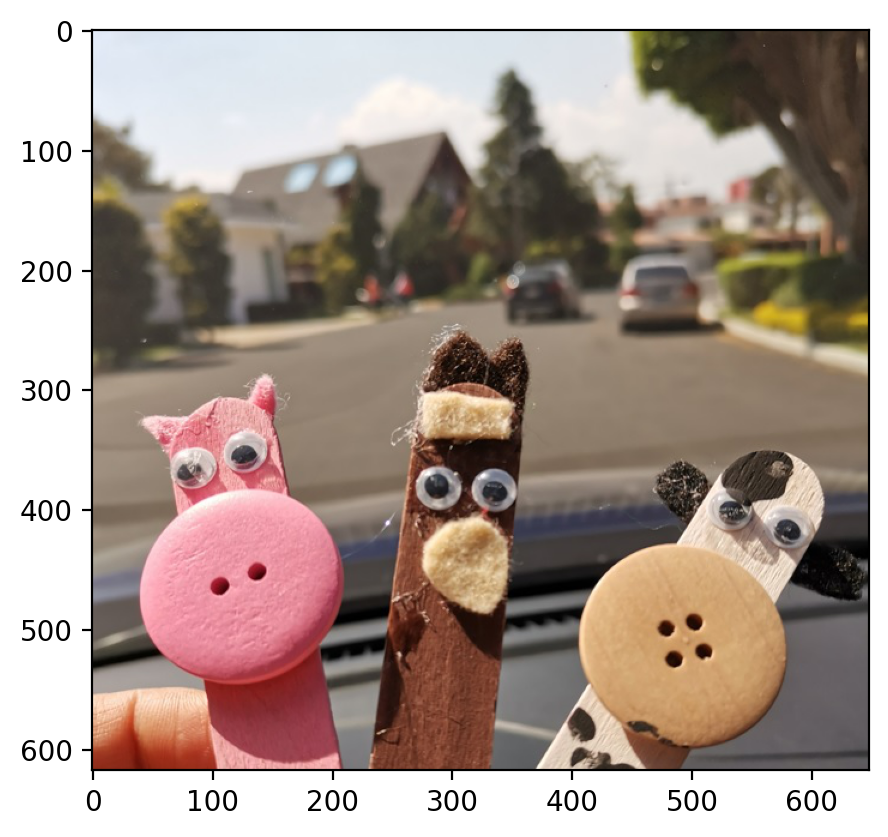

In [1]:
# Let's open a JPEG image file using the pyplot.imread function.

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = 'retina'

jpeg = plt.imread('stickanimals.jpg')
plt.imshow(jpeg)


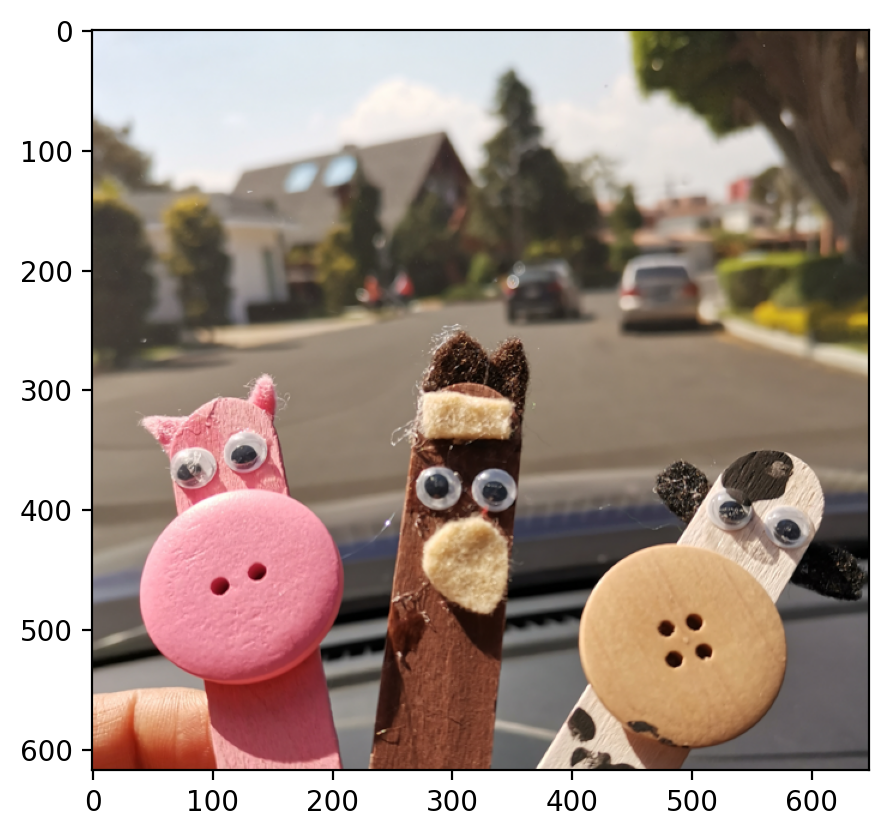

In [2]:
# Now let's open an equivalent PNG image file

png = plt.imread('stickanimalsRGBA.png')
plt.imshow(png)

In [3]:
# Let's see their dimensions

print(np.shape(jpeg))
print(np.shape(png))


(617, 648, 3)
(617, 648, 4)


In [4]:
# Let's see their upper left pixel

print(jpeg[0,0])
print(png[0,0])

[230 238 251]
[0.9019608  0.93333334 0.9882353  1.        ]


In [5]:
# Now let's see their data type

print('JPEG image type: ', type(jpeg[0,0,0]))
print('PNG image type: ', type(png[0,0,0]))


JPEG image type:  <class 'numpy.uint8'>
PNG image type:  <class 'numpy.float32'>


In [ ]:
# To convert an RGBA image array that represents data with floating 
# point numbers from 0 to 1 into the RGB integer format from 0 to 255, 
# we need to change 4 things:

# 1) Get rid of the A channel
# 2) Multiply by 255
# 3) Round the resulting values
# 4) Ensure values are between 0 and 255
# 5) Convert data to 8-bit integers

# Let's define a function for this:

def adapt_PNG(the_PNG):
    the_PNG = the_PNG[:,:,:3]      # Step 1
    the_PNG = the_PNG * 255        # Step 2
    the_PNG = adapt_image(the_PNG) # Steps 3, 4, 5
    return the_PNG


# The following function will be useful to perform steps 3, 4, and 5 
# for RGB images in the 0-255 range, which are undergoing operations 
# that may result in floating point numbers.

def adapt_image(the_img):
    return np.uint8(np.clip(the_img.round(),0,255)) # Steps 3, 4, 5



In [ ]:
# So from now on, when opening PNG files for these exercises, 
# you may use the adapt_PNG function from EC_CV like this:

from EC_CV import *

img = adapt_PNG(plt.imread("stickanimalsRGBA.png"))

print('PNG image data type: ', type(img[0,0,0]))
print(img[0,0])
plt.imshow(img)

In [ ]:
# Lastly, let's save a file.
# This time let's extract the horse as a subarray.

horsie = img[250:600,200:400,:]
plt.imsave('horsie.jpg',horsie)